## Analyzing list of synapses ##  
Looking for patterns in synapse density / molecule count and correlation with imaging conditions.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from matplotlib.offsetbox import AnchoredText

# Change directory
os.chdir("/home/gayatri/storm/cochlea/exp-6-p15-9-Oct/20-10-12-set1-ribA-single")

In [2]:
# Load the list of synapses
slist = pd.read_csv('exp-6-2-synapses.csv')

In [3]:
movie = 7
# num = 3
s = slist['d'][(slist['movie']==movie)&(slist['focus']=='g')]
s.describe()

count      3.000000
mean     226.666667
std       62.010752
min      156.000000
25%      204.000000
50%      252.000000
75%      262.000000
max      272.000000
Name: d, dtype: float64

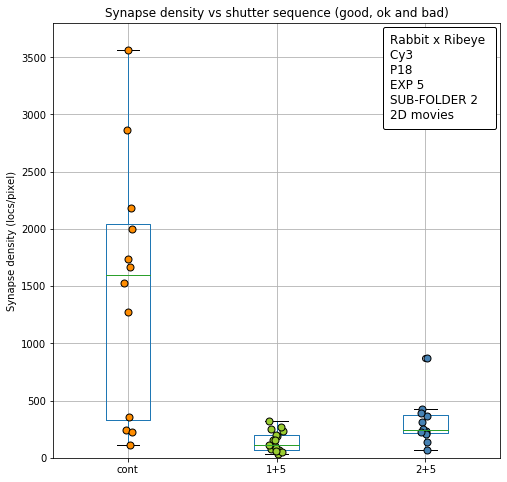

In [4]:
fig, ax = plt.subplots(figsize = (8,8))

options1 = [1,2] # continuous activation
options2 = [3,7] # 1+5 shuttering
options3 = [4,5,6,8] # 2+5 shuttering
quality = ['g', 'ok', 'b']

m1 = slist['d'][(slist['movie'].isin(options1))&(slist['focus'].isin(quality))]
m2 = slist['d'][(slist['movie'].isin(options2))&(slist['focus'].isin(quality))]
m3 = slist['d'][(slist['movie'].isin(options3))&(slist['focus'].isin(quality))]

data = pd.DataFrame({ "cont":m1, "1+5":m2, "2+5":m3 })

data.boxplot()

for i,d in enumerate(data):
    y = data[d]
    x = numpy.random.normal(i+1, 0.02, len(y))
    plt.plot(x, y, mfc = ["darkorange","yellowgreen","steelblue"][i], mec='k', ms=7, marker="o", linestyle="None")
plt.ylim([0, 3800])
# ax1 = plt.bar(x=['cont', '1+5', '2+5'], height=[m1,m2,m3], yerr=[std1, std2, std3], capsize=5, width=0.5, color='yellowgreen', alpha=0.7)
plt.title('Synapse density vs shutter sequence (good, ok and bad)')
plt.ylabel('Synapse density (locs/pixel)')
at = AnchoredText('Rabbit x Ribeye \nCy3 \nP18 \nEXP 5 \nSUB-FOLDER 2 \n2D movies',
                loc='upper right', prop=dict(size=12), frameon=True,
                )
at.patch.set_boxstyle("round,pad=0.2,rounding_size=0.2")
ax.add_artist(at)
# plt.savefig('density_boxplot.png')
# ax.legend(labels = ('cont', '1+5', '2+5'))